In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# prepare data
df = pd.read_csv("Voc-SoE.csv")
data = df.to_numpy()
x_train = data[:,1].reshape(-1,1)
y_train = data[:,0].ravel()

# train model
model = MLPRegressor(hidden_layer_sizes=(1000,100,100), activation = 'tanh', solver = 'adam')
model.fit(x_train,y_train)

# test accuracy
y_pred = model.predict(x_train).reshape(-1,1)
# print(f"coefs = {model.coefs_}")
# print(f"intercepts = {model.intercepts_}")
print(f"score = {r2_score(y_train,y_pred)}")




score = 0.9990078206002453


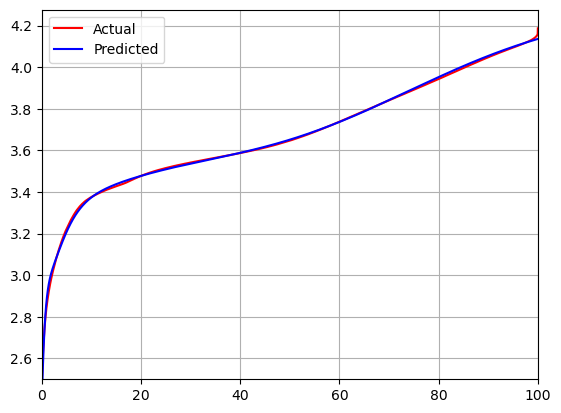

In [6]:
plt.plot(x_train,y_train, 'r', label = "Actual")
plt.plot(x_train, y_pred, 'b', label = "Predicted")
plt.xlim(0,100)
plt.ylim(bottom = 2.5)
plt.grid(1)
plt.legend()
plt.show()